In [120]:
import numpy as np
import seaborn as sns
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px



data = pd.read_csv("Resources/yelp_output.csv", error_bad_lines=False, encoding = 'UTF-16LE')
yelp_ratings = data[['Restaurant Name','Inspection Score', "yelp_rating", "Rating","Rating Count","yelp_review_count"]]
yelp_ratings = yelp_ratings[np.isfinite(yelp_ratings['yelp_rating'])]
df = yelp_ratings.rename(columns={"Restaurant Name": "Restaurant Name", "Inspection Score": "Health Inspection Score",
                                  "yelp_rating":"Yelp Rating", "Rating":"Google Rating", "Rating Count":"Google Review Count",
                                  "yelp_review_count":"Yelp Review Count"})
df

Restaurant Name  Health Inspection Score  Yelp Rating  \
1                   A & J BAKERY                       92          3.0   
3     A PLUS GROCERY BEER & WINE                       82          3.0   
4                A SANDWICH SHOP                       92          3.0   
5       A TASTE OF WAYS CATERING                       97          4.5   
6               A TO Z FOOD MART                       97          2.0   
...                          ...                      ...          ...   
2164                   ZIO CECIO                       97          4.0   
2165        ZIZI RAMEN AND SUSHI                       89          4.5   
2166                    ZIZIKI'S                       80          4.0   
2167               ZOE'S KITCHEN                       90          3.0   
2168               ZOE'S KITCHEN                       94          3.5   

      Google Rating  Google Review Count  Yelp Review Count  
1               4.0                   60               55.0  
3               4.3                   44               29.0  
4               5.0                    1                2.0  
5               4.6                   97                6.0  
6               4.4                   96                1.0  
...             ...                  ...                ...  
2164            4.5                  110              108.0  
2165            4.6                  118               76.0  
2166            4.6                  332              353.0  
2167            4.2                  334               79.0  
2168            4.3                  125               73.0  

[1599 rows x 6 columns]

In [121]:
sns.set(style="white", palette="muted", color_codes=True)

In [126]:
fig = px.scatter(df, x="Yelp Rating", y="Health Inspection Score", trendline="ols")
fig.show()

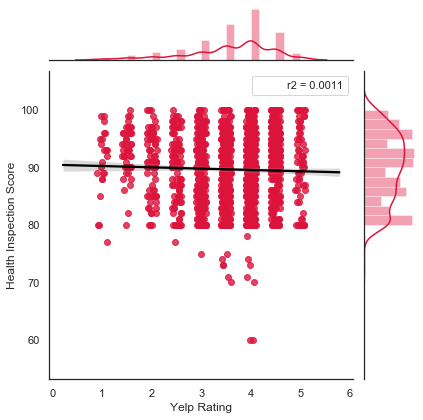

In [113]:
x="Yelp Rating"
y="Health Inspection Score"

#0% indicates that the model explains none of the variability of the response data around its mean.

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x="Yelp Rating", y="Health Inspection Score", data = df, kind="reg", x_jitter=.1, color = "crimson", joint_kws={'line_kws':{'color':'black'}}, stat_func = r2);

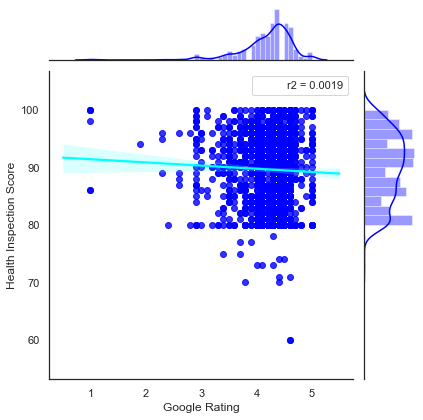

In [114]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(x="Google Rating", y="Health Inspection Score", data = df, kind="reg", color = "blue", joint_kws={'line_kws':{'color':'cyan'}}, stat_func = r2);

In [130]:
fig = px.scatter(df, x="Yelp Rating", y="Google Rating", trendline="ols")
fig.show()

In [136]:
fig = px.scatter(df, x="Yelp Rating", y="Health Inspection Score", size="Yelp Review Count",
           hover_name="Restaurant Name", log_x=True, size_max=60)
fig.show()

In [137]:
fig = px.scatter(df, x="Google Rating", y="Health Inspection Score", size="Google Review Count",
           hover_name="Restaurant Name", log_x=True, size_max=60)
fig.show()